![Google LAndmark Recognition](https://miro.medium.com/max/2680/1*d70CQj7zmTsy01WQvi5cpg.jpeg)

# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Visualization:** 
    - Histogram of Count of Landmark ID
    - Plot the most frequent landmark_ids
    - Plot the least frequent landmark_ids
    - Landmark ID distribution
    - Landmark Id Density Plot
    - Landmark id distribuition and density plot
    - Training set: number of images per class(line plot)
    - Training set: number of images per class(statter plot)
    - Visualize outliers, min/max or quantiles of the landmarks count
    - Probability Plot
4. **Plot Random Images**    

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import glob
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../input/landmark-recognition-2020/train.csv")
train.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [3]:
# Check for Duplicates
train.duplicated().sum()

0

In [4]:
print("Training data size",train.shape)
submission = pd.read_csv("../input/landmark-recognition-2020/sample_submission.csv")
submission.head()

Training data size (1580470, 2)


,id,landmarks
0,00084cdf8f600d00,137790 0.1
1,000b15b043eb8cf0,137790 0.1
2,0011a52f9b948fd2,137790 0.1
3,00141b8a5a729084,137790 0.1
4,0018aa4b92532b77,137790 0.1


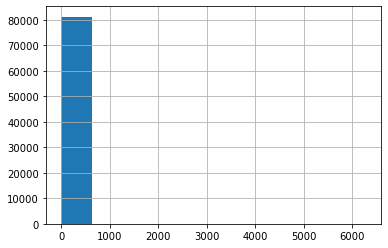

In [5]:
train['landmark_id'].value_counts().hist()

In [6]:
# missing data in training data 
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
landmark_id,0,0.0
id,0,0.0


In [7]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,138982,6272
1,126637,2231
2,20409,1758
3,83144,1741
4,113209,1135
5,177870,1088
6,194914,1073
7,149980,971


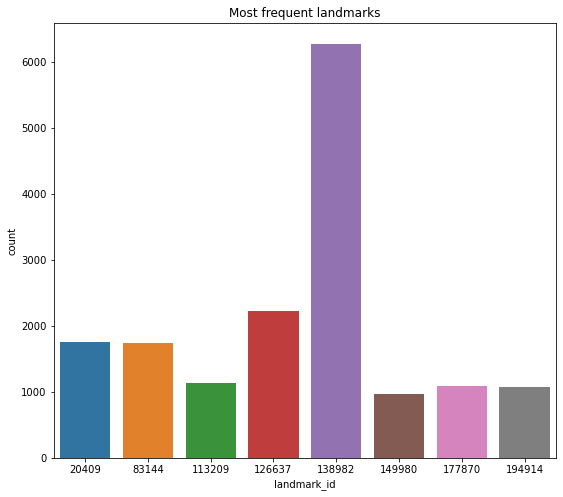

In [8]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [9]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(train.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,4171,2
1,73532,2
2,195143,2
3,180503,2
4,179834,2
5,183115,2
6,63266,2
7,197219,2


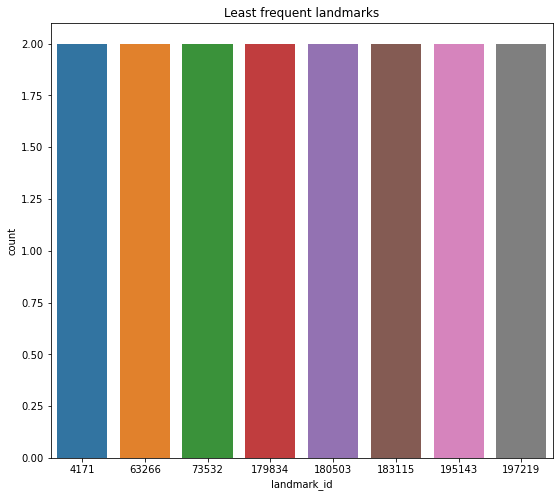

In [10]:
# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [11]:
train.nunique()

id             1580470
landmark_id      81313
dtype: int64

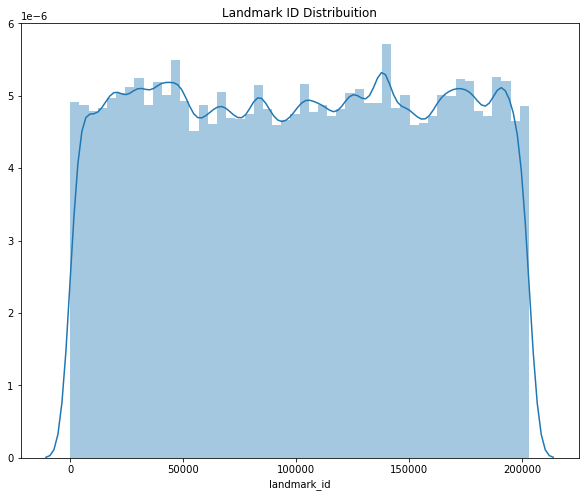

In [12]:
#Landmark ID distribution
plt.figure(figsize = (10, 8))
plt.title('Landmark ID Distribuition')
sns.distplot(train['landmark_id'])

plt.show()

In [13]:
print("Number of classes under 20 occurences",(train['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train['landmark_id'].unique()))

Number of classes under 20 occurences 61620 out of total number of categories 81313


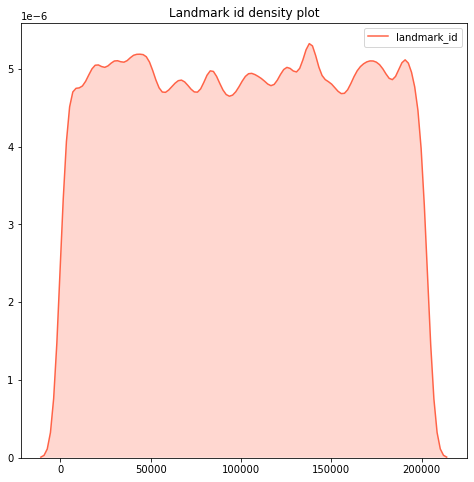

In [14]:
# Landmark Id Density Plot
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train['landmark_id'], color="tomato", shade=True)
plt.show()

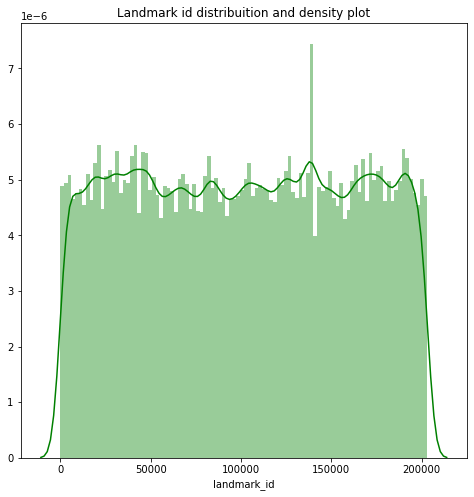

In [15]:
#Landmark id distribuition and density plot
plt.figure(figsize = (8, 8))
plt.title('Landmark id distribuition and density plot')
sns.distplot(train['landmark_id'],color='green', kde=True,bins=100)
plt.show()

[Text(0, 0.5, 'Number of images'), Text(0.5, 0, 'Landmarks')]

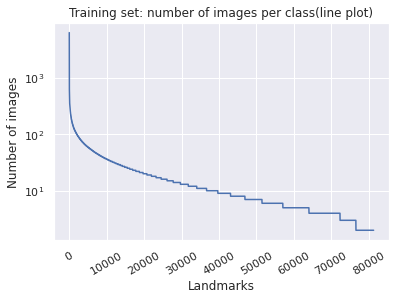

In [16]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
sns.set_color_codes("pastel")
landmarks_fold = pd.DataFrame(train['landmark_id'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
ax = landmarks_fold['count'].plot(logy=True, grid=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

[Text(0, 0.5, 'Number of images'), Text(0.5, 0, 'Landmarks')]

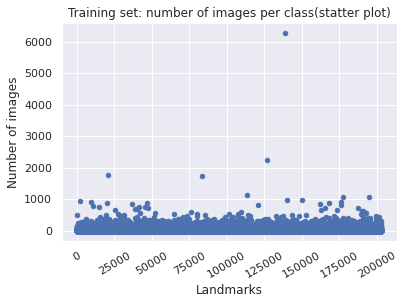

In [17]:
#Training set: number of images per class(statter plot)
sns.set()
landmarks_fold_sorted = pd.DataFrame(train['landmark_id'].value_counts())
landmarks_fold_sorted.reset_index(inplace=True)
landmarks_fold_sorted.columns = ['landmark_id','count']
landmarks_fold_sorted = landmarks_fold_sorted.sort_values('landmark_id')
ax = landmarks_fold_sorted.plot.scatter(\
     x='landmark_id',y='count',
     title='Training set: number of images per class(statter plot)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

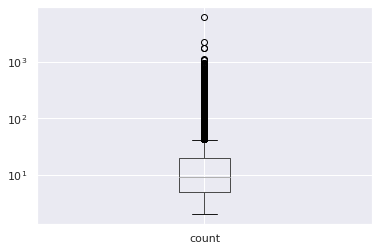

In [18]:
# Visualize outliers, min/max or quantiles of the landmarks count
sns.set()
ax = landmarks_fold_sorted.boxplot(column='count')
ax.set_yscale('log')

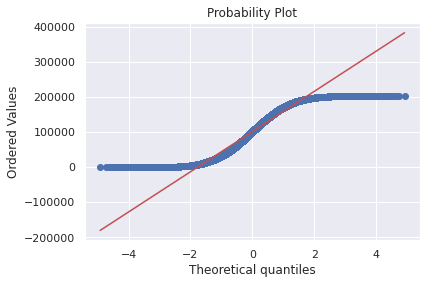

In [19]:
# Probability Plot
sns.set()
res = stats.probplot(train['landmark_id'], plot=plt)

## Plot Random Images

In [20]:
train_list = glob.glob('../input/landmark-recognition-2020/train/*/*/*/*')

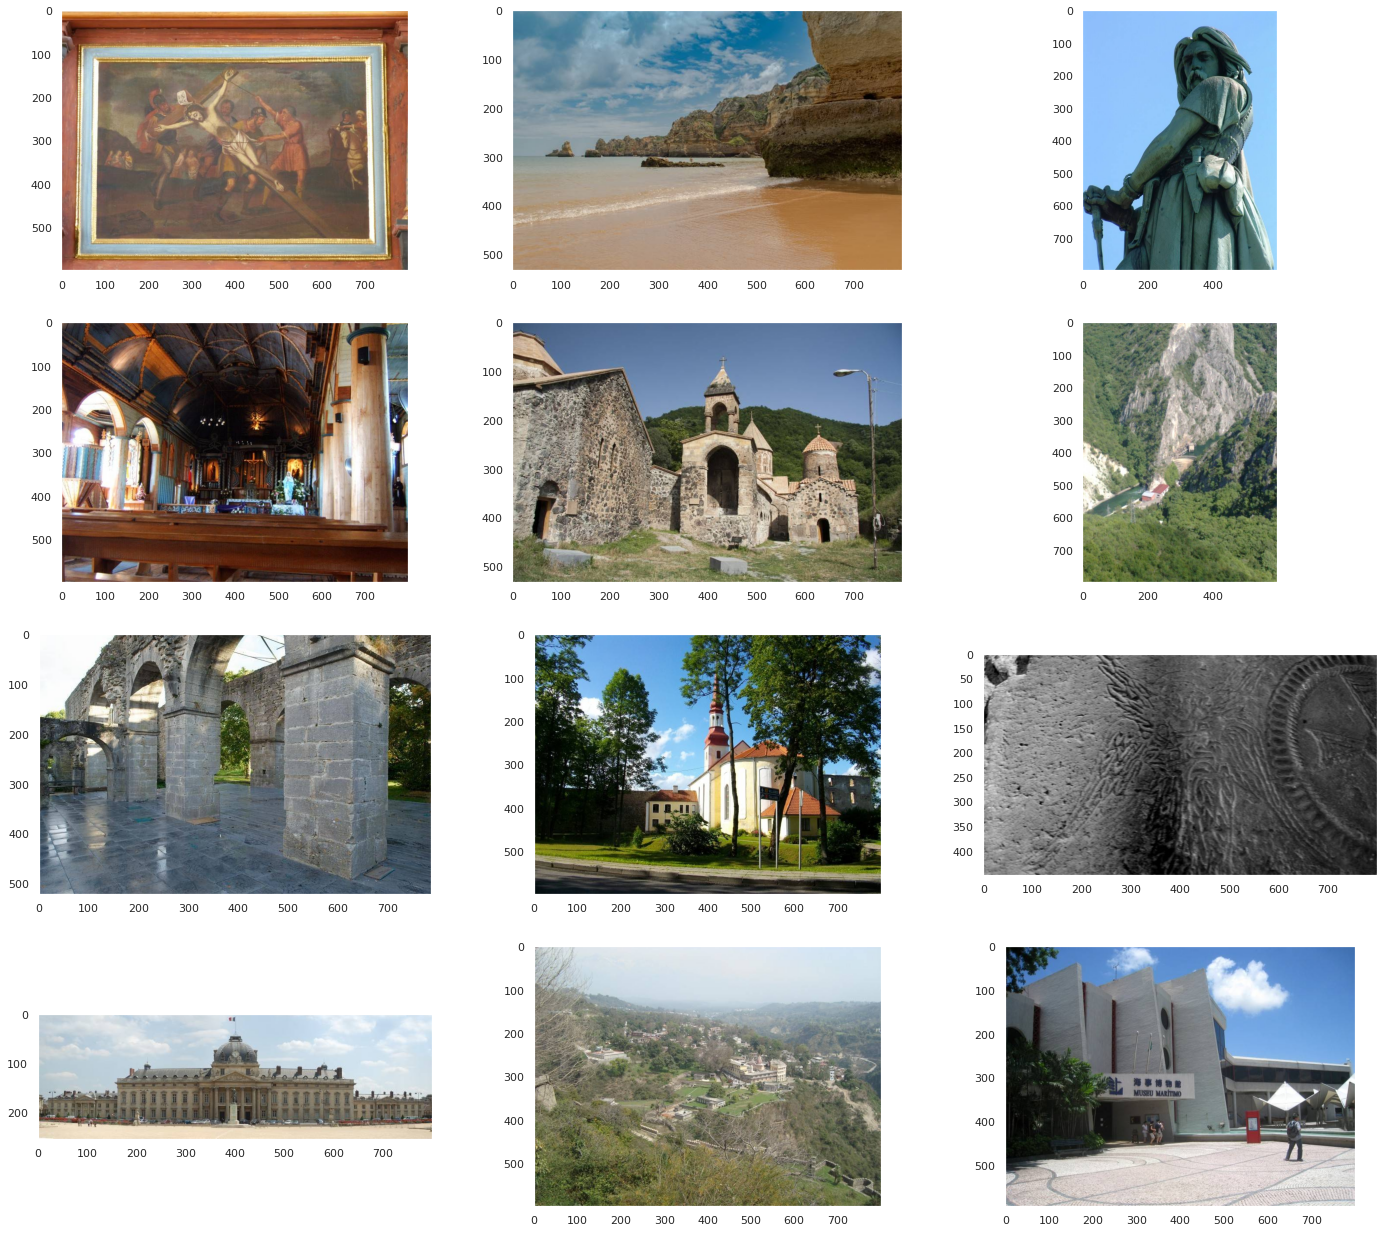

In [21]:
plt.rcParams["axes.grid"] = False
f, axarr = plt.subplots(4, 3, figsize=(24, 22))

curr_row = 0
for i in range(12):
    example = cv2.imread(train_list[i])
    example = example[:,:,::-1]
    
    col = i%4
    axarr[col, curr_row].imshow(example)
    if col == 3:
        curr_row += 1

## References
 - [Google Landmarks v2 Exploratory Data Analysis(EDA)](https://www.kaggle.com/huangxiaoquan/google-landmarks-v2-exploratory-data-analysis-eda/data)
 - [Google Landmark Recogn. Challenge Data Exploration](https://www.kaggle.com/gpreda/google-landmark-recogn-challenge-data-exploration)
 - [A Very Extensive Landmark Exploratory Analysis](https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis) 
 - [Diving into Google’s Landmark Recognition Kaggle Competition](https://towardsdatascience.com/diving-into-googles-landmark-recognition-kaggle-competition-6975dbe11072)

### Please Upvote if you found this helpful:)